## Predicting Employee Productivity Using Tree Models

The goal of the following project is to build and use a Decision Tree model to predict the productivity performance of a factory. Additionally we will use an ensamble method: the Random Forest algorithm to double check or improve our model. For this project, we will use the dataset Productivity Prediction of Garment Employees, the original dataset is in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees). Although the dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes, we will focus on working with a classification tree. 

![Image](https://images.unsplash.com/photo-1589793463357-5fb813435467?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=776&q=80)
__Photo by Remy Gieling on Unsplash__

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 22/garments_worker_productivity.csv")

 ### Dataset Exploration

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


The following is the dataset's official column information:

`date`: date in MM-DD-YYYY

`quarter`: a portion of the month — month was divided into four quarters

`department`: associated department with the instance

`day`: day of the week

`team`: associated team number with the instance

`targeted_productivity`: targeted productivity set by the authority for each team for each day

`smv`: standard minute value — the allocated time for a task

`wip`: work in progress — includes the number of unfinished items for products

`over_time`: represents the amount of overtime by each team in minutes

`incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

`idle_time`: the duration of time when the production was interrupted due to several reasons

`idle_men`: the number of workers who were idle due to production interruption

`no_of_style_change`: number of changes in the style of a particular product

`no_of_workers`: number of workers on each team

`actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In [4]:
df.shape

(1197, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

`wip` is the only column that contains null values and we have 4 columns with datatype as object.

In [6]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Next, we will explore every column individually.

---

`date` column

In [7]:
df["date"].sample(10, random_state = 14)

959     2/26/2015
464     1/27/2015
672      2/8/2015
321     1/19/2015
282     1/17/2015
307     1/18/2015
609      2/4/2015
1123     3/8/2015
877     2/22/2015
950     2/26/2015
Name: date, dtype: object

In [8]:
df["date"].sort_values()

0       1/1/2015
18      1/1/2015
17      1/1/2015
16      1/1/2015
15      1/1/2015
          ...   
1131    3/9/2015
1130    3/9/2015
1129    3/9/2015
1137    3/9/2015
1147    3/9/2015
Name: date, Length: 1197, dtype: object

The dataset contains data from January 2015 to March 2015

***

`quarter` column

The term "quarter" usually refers to part of a year, but here, it's actually referring to part of a month.

In [9]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

Let's further explore the data with the Quarter 5 classification

In [10]:
df[df["quarter"] == "Quarter5"]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


We can see that "Quarter 5" always comprises observations where the date is either 29th or 31st.

***

`department` column

In [11]:
df["department"].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

We have two distinct "finishing" values (probably because of an extra space)

In [12]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

***

`day` column

In [13]:
df["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

There are no Friday observations (maybe the factory is closed on Fridays).

***

`team` column

For this column we will organize the value counts by sorting the team numbers in ascending order to get the team number and the number of values associated with it.

In [14]:
df["team"].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

***

`targeted_productivity` & `actual_productivity` columns

We will check these 2 columns together
Productivity was higher than expected:

In [15]:
df[df["actual_productivity"] > df["targeted_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


Actual productivity was exactly equal to the target productivity:

In [16]:
df[df["targeted_productivity"] == df["actual_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


Actual productivity failed to meet the target:

In [17]:
df[df["targeted_productivity"] > df["actual_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Checking the observations where the actual productivity was higher than 1, despite the description indicating that 1 was the maximum possible value.

In [18]:
df[df["actual_productivity"] > 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


***

`wip` column

The only column with missing observations

In [19]:
df[df["wip"].notnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [20]:
df[df["wip"].isnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


***

`over_time` column

In [21]:
df["over_time"].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

It has a wide range of values. Next we will check the observations that are above the 50% percentile

In [22]:
df[df["over_time"] > 3960]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


Columns without overtime:

In [23]:
df[df["over_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [24]:
len(df[df["over_time"] == 0])

31

We have 31 total observations without overtime

Observations where the productivity standards were met without overtime:

In [25]:
df[(df["over_time"] == 0) & (df["actual_productivity"] > df["targeted_productivity"])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


We can conclude that it's a rare event to meet targets without putting in overtime.

***

`incentive` column

In [26]:
len(df[df["incentive"] == 0])

604

More than half of the entire dataset contains worker that don't have any kind of incentive.

In [27]:
df[df["incentive"] > 50]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
27,1/3/2015,Quarter1,sweing,Saturday,12,0.80,26.16,844.0,7080,63,0.0,0,0,59.0,0.800319
32,1/3/2015,Quarter1,sweing,Saturday,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.787300
45,1/4/2015,Quarter1,sweing,Sunday,9,0.80,26.16,1278.0,7080,60,0.0,0,0,59.0,0.850569
46,1/4/2015,Quarter1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3/10/2015,Quarter2,sweing,Tuesday,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0.850084
1158,3/10/2015,Quarter2,sweing,Tuesday,12,0.80,15.26,1069.0,4080,63,0.0,0,0,34.0,0.800402
1159,3/10/2015,Quarter2,sweing,Tuesday,3,0.80,30.10,756.0,6960,63,0.0,0,1,58.0,0.800072
1178,3/11/2015,Quarter2,sweing,Wednesday,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402


Observations that include incentives greater than 50 are only a third with respect to the number of observations without incentives

In [28]:
df[df["incentive"] > 100]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
543,2/1/2015,Quarter1,sweing,Sunday,2,0.80,22.52,1396.0,6900,113,0.0,0,0,57.5,1.000671
544,2/1/2015,Quarter1,sweing,Sunday,1,0.80,22.94,1582.0,3060,113,0.0,0,0,58.5,1.000402
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
581,2/3/2015,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019


In [29]:
len(df[df["incentive"] > 100])

34

We only have 34 observations with incentives above 100

***

`idle_time` & `idle_men` column

Checking all the observations where there were interruptions in the production process

In [30]:
df[df["idle_time"] > 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


In [31]:
len(df[(df["idle_time"] > 0)])

18

The factory rarely suffers from interruptions, with only 18 observations where something like this happened.

In [32]:
# Sanity check
df[(df["idle_time"] > 0) & (df["idle_men"] == 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [33]:
# Sanity check
len(df[(df["idle_men"] > 0)])

18

***

`no_of_style_change` column

In [34]:
df["no_of_style_change"].describe()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

The number of changes in the style of a particular product was pretty much 0 in most cases. Next we will explore how many observations had changes:

In [35]:
df[df["no_of_style_change"] == 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
634,2/5/2015,Quarter1,sweing,Thursday,4,0.50,30.10,417.0,6360,23,0.0,0,1,53.0,0.500720
651,2/7/2015,Quarter1,sweing,Saturday,4,0.60,30.10,486.0,6780,30,0.0,0,1,57.0,0.600224
671,2/8/2015,Quarter2,sweing,Sunday,4,0.65,30.10,712.0,6780,44,0.0,0,1,56.5,0.568260
683,2/9/2015,Quarter2,sweing,Monday,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003
689,2/9/2015,Quarter2,sweing,Monday,7,0.35,30.10,842.0,6960,0,0.0,0,1,58.0,0.350302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [36]:
df[df["no_of_style_change"] == 2]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
744,2/12/2015,Quarter2,sweing,Thursday,11,0.50,11.41,1039.0,2280,0,0.0,0,2,55.0,0.500123
761,2/14/2015,Quarter2,sweing,Saturday,11,0.60,11.41,1039.0,2280,23,0.0,0,2,55.0,0.600448
777,2/15/2015,Quarter3,sweing,Sunday,11,0.65,11.41,700.0,2640,23,0.0,0,2,53.0,0.650224
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
799,2/16/2015,Quarter3,sweing,Monday,11,0.70,11.41,680.0,2160,30,0.0,0,2,54.0,0.565972
813,2/17/2015,Quarter3,sweing,Tuesday,11,0.70,11.41,1054.0,3420,30,0.0,0,2,56.0,0.700614
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
826,2/18/2015,Quarter3,sweing,Wednesday,11,0.70,11.41,685.0,3360,30,0.0,0,2,56.0,0.821113
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399
854,2/19/2015,Quarter3,sweing,Thursday,11,0.70,11.41,653.0,3480,30,0.0,0,2,58.0,0.700540


In [37]:
len(df[df["no_of_style_change"] == 2])

33

Only 33 observations in the whole dataset included two changes of style.

***

`no_of_workers` column

For this column, we will explore different observations that surpass a certain number of workers in each team. We will use the 75% percentile (57) as a threshold.

In [38]:
df[df["no_of_workers"] > 57]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
10,1/1/2015,Quarter1,sweing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721127
17,1/1/2015,Quarter1,sweing,Thursday,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.521180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,3/11/2015,Quarter2,sweing,Wednesday,3,0.80,30.10,735.0,6960,63,0.0,0,1,58.0,0.800072
1180,3/11/2015,Quarter2,sweing,Wednesday,11,0.80,11.41,560.0,3420,50,0.0,0,0,58.0,0.800035
1186,3/11/2015,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051


In [39]:
#Sanity check
df[df["no_of_workers"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


### Dataset Cleaning (I)

Based on the previous fidnings, in this phase of the project we will perform data cleaning to 
* Fix any incorrect observations that could be present in our columns.
* Decide which columns we will keep to fit the decision tree algorithm.

We start the cleaning process with the "department" column where we found a trailing space that generated two different "finishing" values.

In [40]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

We will drop the date column since it only contains data from January to March and it doesn't have too much potential to offer predictive power (to reveal seasonal tendencies)

In [41]:
df = df.drop("date", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500


For the quarter columns we will merge the "quarter5" values into the "quarter4" ones. We will create "dummies" for the quarter column and since "quarter5" only has 44 observations and covers two days, it may be a bit unnecessary to generate a whole column for such a small amount of observations.

In [42]:
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

We consider unnecessary to feature the words "quarter" for every value, when we can simply use integers.

In [43]:
df.loc[df["quarter"] == "Quarter1", "quarter"] = 1
df.loc[df["quarter"] == "Quarter2", "quarter"] = 2
df.loc[df["quarter"] == "Quarter3", "quarter"] = 3
df.loc[df["quarter"] == "Quarter4", "quarter"] = 4
df["quarter"].value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

In [44]:
df["quarter"] = df["quarter"].astype("int")
df[["quarter"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quarter  1197 non-null   int32
dtypes: int32(1)
memory usage: 4.8 KB


We will get rid of the "idle_time" & "idle_men" columns, as there are only 18 observations with non-zero values. They are pretty uniform columns and they barely add any information.

In [45]:
df = df.drop(["idle_time", "idle_men"], axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0,8.0,0.886500


We will also drop the "wip" column. It has too many empty observations, and we can't tell if an empty cell is equal to zero unfinished products or if it's simply missing information. 

In [46]:
df = df.drop("wip", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,0,8.0,0.886500


Finally, we will remove the "no_of_style_change" column, due to only 147 observations where there are changes. Also, the number of changes were minor (only 1 or 2).

In [47]:
df = df.drop("no_of_style_change", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500


"no_of_workers" column features floats instead of integers

In [48]:
df["no_of_workers"] = df["no_of_workers"].astype("int")
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500


"actual_productivity" should feature two decimals, just like "targeted_productivity"

In [49]:
df["actual_productivity"] = df["actual_productivity"].round(2)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


The goal is to build a Classification Tree so our target columns, actual_productivity must bet categorical, not numerical. For this, we will create a new column called "productive" that will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset.

In [50]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.sample(10, random_state = 14)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
959,4,finishing,Thursday,10,0.70,2.90,3360,0,8,0.41,False
464,4,finishing,Tuesday,8,0.65,3.94,960,0,8,0.85,True
672,2,sweing,Sunday,7,0.70,24.26,6960,0,58,0.36,False
321,3,sweing,Monday,6,0.80,11.41,4380,50,31,0.80,True
282,3,finishing,Saturday,9,0.80,3.94,1800,0,10,0.83,True
307,3,sweing,Sunday,10,0.70,22.52,10080,40,56,0.70,True
609,1,finishing,Wednesday,9,0.75,3.94,960,0,8,0.76,True
1123,2,sweing,Sunday,8,0.60,30.48,6720,0,56,0.60,True
877,4,sweing,Sunday,9,0.70,18.79,3240,30,57,0.63,False
950,4,sweing,Thursday,3,0.75,29.40,6840,45,57,0.75,True


The columns that remained:

In [51]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

### Dataset Cleaning (II)

We need to convert some columns from categorical to numerical to use them in our model.

In [52]:
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)
df.rename(columns = {"department": "dept_sweing"}, inplace = True) # Also changing column's name here
df.head(10)

,quarter,dept_sweing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
0,1,1,Thursday,8,0.80,26.16,7080,98,59,0.94,True
1,1,0,Thursday,1,0.75,3.94,960,0,8,0.89,True
2,1,1,Thursday,11,0.80,11.41,3660,50,30,0.80,True
3,1,1,Thursday,12,0.80,11.41,3660,50,30,0.80,True
4,1,1,Thursday,6,0.80,25.90,1920,50,56,0.80,True
5,1,1,Thursday,7,0.80,25.90,6720,38,56,0.80,True
6,1,0,Thursday,2,0.75,3.94,960,0,8,0.76,True
7,1,1,Thursday,3,0.75,28.08,6900,45,57,0.75,True
8,1,1,Thursday,2,0.75,19.87,6000,34,55,0.75,True
9,1,1,Thursday,1,0.75,28.08,6900,45,57,0.75,True


For the "quarter" column, we will use "dummies", because if we leave the numbers as they currently are, the Decision Tree would believe that quarter 4 is greater than quarter 1 (since they are categories instead of ordinal values).

In [53]:
df = pd.concat([df, pd.get_dummies(df["quarter"], prefix = "q")], axis = 1) \
       .drop(["quarter"], axis = 1)
df.sample(10, random_state = 14)

,dept_sweing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4
959,0,Thursday,10,0.70,2.90,3360,0,8,0.41,False,0,0,0,1
464,0,Tuesday,8,0.65,3.94,960,0,8,0.85,True,0,0,0,1
672,1,Sunday,7,0.70,24.26,6960,0,58,0.36,False,0,1,0,0
321,1,Monday,6,0.80,11.41,4380,50,31,0.80,True,0,0,1,0
282,0,Saturday,9,0.80,3.94,1800,0,10,0.83,True,0,0,1,0
307,1,Sunday,10,0.70,22.52,10080,40,56,0.70,True,0,0,1,0
609,0,Wednesday,9,0.75,3.94,960,0,8,0.76,True,1,0,0,0
1123,1,Sunday,8,0.60,30.48,6720,0,56,0.60,True,0,1,0,0
877,1,Sunday,9,0.70,18.79,3240,30,57,0.63,False,0,0,0,1
950,1,Thursday,3,0.75,29.40,6840,45,57,0.75,True,0,0,0,1


We will repeat the above process for the "day" column

In [54]:
df = pd.concat([df, pd.get_dummies(df["day"], prefix= None)], axis=1) \
       .drop(["day"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
959,0,10,0.70,2.90,3360,0,8,0.41,False,0,0,0,1,0,0,0,1,0,0
464,0,8,0.65,3.94,960,0,8,0.85,True,0,0,0,1,0,0,0,0,1,0
672,1,7,0.70,24.26,6960,0,58,0.36,False,0,1,0,0,0,0,1,0,0,0
321,1,6,0.80,11.41,4380,50,31,0.80,True,0,0,1,0,1,0,0,0,0,0
282,0,9,0.80,3.94,1800,0,10,0.83,True,0,0,1,0,0,1,0,0,0,0
307,1,10,0.70,22.52,10080,40,56,0.70,True,0,0,1,0,0,0,1,0,0,0
609,0,9,0.75,3.94,960,0,8,0.76,True,1,0,0,0,0,0,0,0,0,1
1123,1,8,0.60,30.48,6720,0,56,0.60,True,0,1,0,0,0,0,1,0,0,0
877,1,9,0.70,18.79,3240,30,57,0.63,False,0,0,0,1,0,0,1,0,0,0
950,1,3,0.75,29.40,6840,45,57,0.75,True,0,0,0,1,0,0,0,1,0,0


We will repeat the above process for the "team" column

In [55]:
df = pd.concat([df, pd.get_dummies(df["team"], prefix= "team")], axis=1) \
       .drop(["team"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
959,0,0.70,2.90,3360,0,8,0.41,False,0,0,...,0,0,0,0,0,0,0,1,0,0
464,0,0.65,3.94,960,0,8,0.85,True,0,0,...,0,0,0,0,0,1,0,0,0,0
672,1,0.70,24.26,6960,0,58,0.36,False,0,1,...,0,0,0,0,1,0,0,0,0,0
321,1,0.80,11.41,4380,50,31,0.80,True,0,0,...,0,0,0,1,0,0,0,0,0,0
282,0,0.80,3.94,1800,0,10,0.83,True,0,0,...,0,0,0,0,0,0,1,0,0,0
307,1,0.70,22.52,10080,40,56,0.70,True,0,0,...,0,0,0,0,0,0,0,1,0,0
609,0,0.75,3.94,960,0,8,0.76,True,1,0,...,0,0,0,0,0,0,1,0,0,0
1123,1,0.60,30.48,6720,0,56,0.60,True,0,1,...,0,0,0,0,0,1,0,0,0,0
877,1,0.70,18.79,3240,30,57,0.63,False,0,0,...,0,0,0,0,0,0,1,0,0,0
950,1,0.75,29.40,6840,45,57,0.75,True,0,0,...,1,0,0,0,0,0,0,0,0,0


### Building the Tree

Now that the data was properly adapted for use in scikit-learn, we're ready to start building our decision tree.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [57]:
#Dividing the prepared dataset in feature and target labels,
#we removed the column "actual_productivity", because it would've been the target column for a Regression Tree
X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]

In [58]:
X[:2]

,dept_sweing,targeted_productivity,smv,over_time,incentive,no_of_workers,q_1,q_2,q_3,q_4,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.75,3.94,960,0,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y[:2]

0    True
1    True
Name: productive, dtype: bool

In [60]:
#Spliting the dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

To ensure that the visualization of our Tree is legible and to avoid overfitting, we set a "max_depth" of 3

In [61]:
#Instantiating a decision tree classifier and fitting the model to the training data
tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

Now we will make the predictions on the test set and then we will use them to determine the algorithm's accuracy.

In [62]:
y_pred = tree.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.85


### Visualizing and Evaluating the Tree

Now that the model is instantiated and fitted to the data, we can visualize the results.

In [64]:
tree.classes_

array([False,  True])

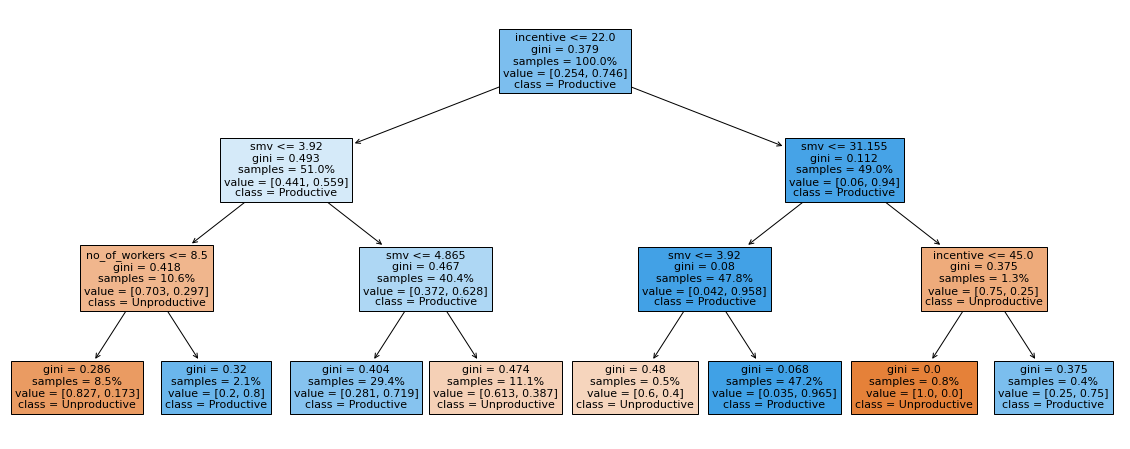

In [65]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

The most significant columns seem to be "incentive" and "smv" (Standard Minute Value, or the allocated time for a task). All the splits, except one, used these columns to divide the dataset into more homogeneous subsets.

Now that we plotted the tree, we can continue to evaluate it using alternate metrics: Precision, Recall and F1 Score. We will start with a Confusion Matrix as a reference.

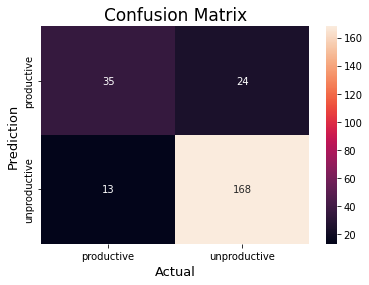

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test, y_pred)

 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['productive', 'unproductive'],
            yticklabels=['productive', 'unproductive'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

__[[True Negatives, False Positives],__

__[False Negatives, True Positives]]__

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [68]:
print("Precision:", round(precision_score(y_test, y_pred), 2))

Precision: 0.88


$ Precision =\frac{ TP}{(TP+FP)} $

In [69]:
print("Recall:", round(recall_score(y_test, y_pred), 2))

Recall: 0.93


$ Recall =\frac{ TP}{(TP+FN)} $

In [70]:
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

F1 Score: 0.9


$ F1 \text{ }Score =2 \times \frac{ Precision \times  Recall}{(Precision+Recall)} $

In [71]:
print("Accuracy:", round(tree.score(X_test, y_test), 2))

Accuracy: 0.85


$ Accuracy = \frac{(TP+FN}{(TP+TN+FP+FN)} $

We also have another option to evaluate our tree: Cross Validation. It mitigates the risk of adapting the trees in excess to the random test subset that train_test_split provided by testing on alternate test subsets. It divides the dataset into folds . Then it creates that many copies of the dataset where each copy will have a different segment of observations compared to the test set.Finally, for each iteration, we'll get a specific score, which will depend on the training and test subsets used in that iteration.

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]


Now let's get Cross Validated values for the other evaluation metrics

In [73]:
print("Mean Cross Validation Score:", scores.mean().round(2))

Mean Cross Validation Score: 0.82


In [74]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

In [75]:
multiple_cross_scores["test_precision"].round(2)

array([0.86, 0.9 , 0.83, 0.85, 0.86, 0.87, 0.78, 0.85, 0.86, 0.87])

In [76]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))

Mean Cross Validated Precision: 0.85


In [77]:
multiple_cross_scores["test_recall"].round(2)

array([0.96, 0.94, 0.94, 1.  , 0.99, 0.9 , 0.85, 0.82, 0.94, 0.84])

In [78]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_recall"].mean(), 2))

Mean Cross Validated F1: 0.92


In [79]:
multiple_cross_scores["test_f1"].round(2)

array([0.91, 0.92, 0.88, 0.92, 0.92, 0.88, 0.82, 0.83, 0.9 , 0.86])

In [80]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated F1: 0.88


We still get reasonable metrics after checking with cross validate so we can conclude the efficiency is real and not just "lucky" due to adapting in excess to a single test subset.

### Explaining the Tree

We know decision trees are a good option if we want to explain our finding to a non-technical audience by allowing them to quickly understand the metrics that lead to success or failure of production objectives.

The graphic above was created using predictions produced by the algorithm we implemented — a Decision Tree.It illustrates which aspects of the factory are best at predicting if a team will be productive or not.In our case, we discovered that the "incentive" and the "smv" variables were the ones with the greatest influence on the final prediction. 

We know this because if we focus on the top part of each box, we will see that those two variables are the ones that appear most frequently (only a single exception in the lower left of the graphic where the variable "number of workers" appears at the top). 
Let's use an example: a fictional date where the "incentive" is 18 and "smv" is 5.16 to predict if a team will be productive or not under these circumstancces. Starting from the root, we see that our first comparison will be 18 <= 22 when we substitute "incentive" for 22.

Since the assertion is True, we follow the arrow to the lower left box (universal rule of Decision Trees: if the assertion is True, we continue to the left; otherwise, if it's False, we continue to the right)


Now we repeat the process for the rest of the boxes. We apply the same approach to the next box, which has the comparrison 5.16 <= 3.92. The assertion is False, we follow the arrow to the lower right box. Again, after substituting "smv" for 5.16 in that box, our final comparison is 5.16 <= 4.865.

The assertion is False, we follow the arrow to the final lower right box, the leaf, which predicts the team will be "Unproductive". In other words, if we have a team with an "incentive" of 18 and a SMV of 5.16, it will be an unproductive team!

### Using Random Forest

In this final section we will try to use an ensemble method to try to improve the model's accuracy. We will use a Random Forest to compare results.

In [81]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.85


In [82]:
feature_scores = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

smv                      0.151916
incentive                0.135960
no_of_workers            0.121367
over_time                0.118488
targeted_productivity    0.075681
dept_sweing              0.029459
Sunday                   0.024849
Monday                   0.023807
q_1                      0.023306
Wednesday                0.023070
Thursday                 0.022831
Saturday                 0.022740
q_2                      0.021451
q_3                      0.020806
q_4                      0.018163
team_8                   0.018129
Tuesday                  0.017483
team_9                   0.015552
team_11                  0.014191
team_7                   0.012995
team_5                   0.012984
team_2                   0.012454
team_6                   0.012322
team_1                   0.012108
team_10                  0.011249
team_4                   0.010465
team_3                   0.009137
team_12                  0.007039
dtype: float64

The OOB score is an alternate metric based on the accuracy when using RandomForestClassifiers (when Random Forest generates training subsets for every individual Tree, it leaves out some observations of the dataset, and if we activate the OOB Score then those observations will be used as test subsets).

In [83]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83


Since the evaluation metrics of our Random Forest are similar to the scores of our Decision Tree, we can be confident about our results!

Because of their tendency to overfit the data, it's always considered good practice to double-check Trees with a Random Forest.

### Conclusion

In this project we:
* Cleaned the data and created a target column for a classification tree

* Built and visualized a decision tree.

* Explained the insights to a non-technical audience.

* Used a random forest to either improve or double check the scores of your tree.  


We found that the most significant columns are "incentive" and "smv" (Standard Minute Value, or the allocated time for a task). 
We got satisfacatory results. The accuracy on the test set was 85%. We used cross-validation to evaluate the tree and we got an accuracy of 82%, a mean Cross Validated Precision of85%, a mean Cross Validated recall of 92% and a mean Cross Validated F1 score of 88%. The accuracy when using the RandomForestClassifier was 85%.